# Projekt Hubert Gogola

### Biblioteki i inne narzędzia wykorzystywane w projekcie

TensorFlow (tf) – biblioteka do tworzenia i trenowania modeli ML.

ImageDataGenerator – narzędzie do augmentacji obrazów (np. obracanie, skalowanie).

Sequential – model, w którym warstwy są dodawane jedna po drugiej.

Warstwy:

Conv2D – warstwa konwolucyjna, wykrywająca cechy obrazu.

MaxPooling2D – redukcja rozmiaru obrazu.

Flatten – przekształca obraz w wektor.

Dense – warstwa klasyfikacyjna.

Dropout – zapobiega przeuczeniu modelu.

Optymalizator Adam – dostosowuje tempo uczenia.

matplotlib.pyplot – do tworzenia wykresów (np. wizualizacja wyników).

numpy – do operacji na tablicach danych (np. obrazach).

os – do pracy z plikami i folderami.

random - pobranie próbek do wizualizacji

load_model – umożliwia wczytanie wcześniej zapisanego modelu.

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import load_model

#### Ścieżki do folderów z danymi

In [18]:
train_dir = './training_set/training_set'
test_dir = './test_set/test_set'

#### Normalizacja i augmentacja danych

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

#### Generator danych treningowych i testowych

In [20]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


#### Normalizacja i augmentacja danych

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


#### Generator danych treningowych i testowych

In [22]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='binary')

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

plt.figure(figsize=(10, 5))


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


C:\Users\huber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 116ms/step - accuracy: 0.5362 - loss: 0.7049 - val_accuracy: 0.6436 - val_loss: 0.6506
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 124ms/step - accuracy: 0.6434 - loss: 0.6365 - val_accuracy: 0.6886 - val_loss: 0.5941
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.6814 - loss: 0.6000 - val_accuracy: 0.7316 - val_loss: 0.5408
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.7196 - loss: 0.5569 - val_accuracy: 0.7420 - val_loss: 0.5342
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.7333 - loss: 0.5326 - val_accuracy: 0.7420 - val_loss: 0.5358
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.7577 - loss: 0.4968 - val_accuracy: 0.7756 - val_loss: 0.4748
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.7691 - loss: 0.4813 - val_accuracy: 0.7672 - val_loss: 0.4906
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.7814 - loss: 0.4648 

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

#### Straty

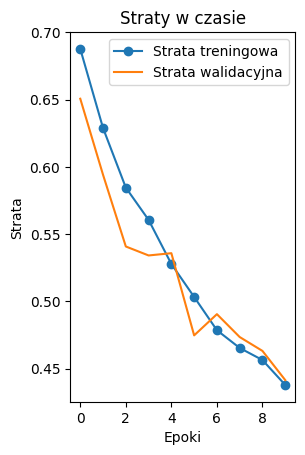

In [23]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'o-', label='Strata treningowa')
plt.plot(history.history['val_loss'], '-', label='Strata walidacyjna')
plt.title('Straty w czasie')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()


#### Dokładność

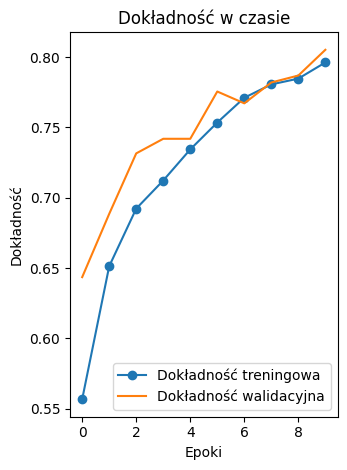

64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8199 - loss: 0.4168
Strata na zbiorze testowym: 0.4416
Dokładność na zbiorze testowym: 0.8052


In [24]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'o-', label='Dokładność treningowa')
plt.plot(history.history['val_accuracy'], '-', label='Dokładność walidacyjna')
plt.title('Dokładność w czasie')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()

plt.tight_layout()
plt.show()


loss, accuracy = model.evaluate(test_generator)
print(f"Strata na zbiorze testowym: {loss:.4f}")
print(f"Dokładność na zbiorze testowym: {accuracy:.4f}")



#### Pobieranie próbki z zestawu testowego, wykonujemy przewidywania na tych obrazach, zaokrąglamy wyniki, a następnie identyfikujemy poprawne i błędne predykcje porównując je z prawdziwymi etykietami.


In [25]:
test_images, test_labels = next(test_generator)

predictions = model.predict(test_images)

predicted_labels = predictions.flatten()

correct = np.where(np.round(predicted_labels) == test_labels)[0]
incorrect = np.where(np.round(predicted_labels) != test_labels)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


#### Wizualizacja

In [26]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

#### 6 poprawnych

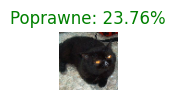

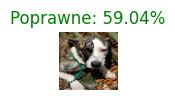

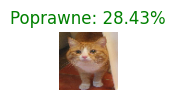

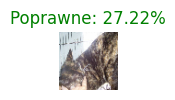

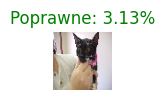

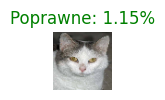

In [27]:
for i, idx in enumerate(correct[:6]):
    plt.subplot(2, 6, i+1)
    plt.imshow(test_images[idx])
    plt.title(f"Poprawne: {predicted_labels[idx]*100:.2f}%", color='green')  # Procent
    plt.axis('off')
    plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Większe odstępy
    plt.show()

#### 6 błędnych

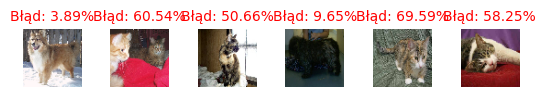

In [28]:
for i, idx in enumerate(incorrect[:6]):
    plt.subplot(2, 6, i+7)
    plt.imshow(test_images[idx])
    plt.title(f"Błąd: {predicted_labels[idx]*100:.2f}%", color='red', fontsize=10)
    plt.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.8)  # Dodanie odstępów
plt.show()


from tensorflow.keras.utils import load_img, img_to_array

#### Ścieżka do zdjęcia psa

In [29]:
image_path = './training_set/training_set/dogs/dog.1.jpg'  

#### Wczytanie obrazu i przygotowanie do predykcji

In [30]:
image = load_img(image_path, target_size=(64, 64))  
image_array = img_to_array(image) / 255.0           
image_array = np.expand_dims(image_array, axis=0)   

prediction = model.predict(image_array)
probability = prediction[0][0] * 100  # Procent

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


#### Zmieniamy etykietę na podstawie prawdopodobieństwa, ale pokazujemy pełną wartość

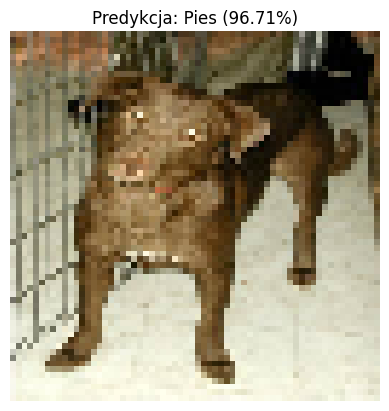

In [31]:
label = 'Pies' if probability > 50 else 'Kot'

plt.imshow(image)
plt.title(f'Predykcja: {label} ({probability:.2f}%)')  # Dokładność predykcji w %
plt.axis('off')
plt.show()

model.save('cat_dog_model.h5')
